
<center><img src="https://koaning.io/posts/gaussian-auto-embeddings/gaussian-auto-embeddings_files/autoencoder1.png"></center>

## Imports



In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

## Preprocessing

### Load dataset

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


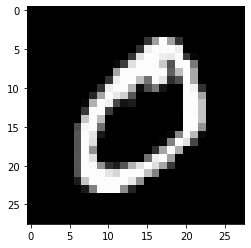

In [3]:
plt.imshow(X_train[1], cmap="gray")

### Data normalization

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Learning

### Building Autoencoder

In [6]:
X_input = tf.keras.layers.Input((28,28,1))
# encoder
X = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same')(X_input)
encoded = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same')(X)
# latent space
# decoder
X = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same')(encoded)
X = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding='same')(X)

model = tf.keras.models.Model(inputs=X_input, outputs=X)
encoder = tf.keras.models.Model(X_input, encoded)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))

encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


### Train

In [7]:
history = model.fit(X_train, X_train, batch_size=100, validation_split=0.1, epochs=30)

Epoch 1/30
540/540 [==============================] - 2s 4ms/step - loss: 0.1484 - val_loss: 0.0759
Epoch 2/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0715 - val_loss: 0.0697
Epoch 3/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0681 - val_loss: 0.0679
Epoch 4/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0671 - val_loss: 0.0674
Epoch 5/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0668 - val_loss: 0.0672
Epoch 6/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0666 - val_loss: 0.0671
Epoch 7/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0666 - val_loss: 0.0670
Epoch 8/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0665 - val_loss: 0.0670
Epoch 9/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0665 - val_loss: 0.0669
Epoch 10/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0664 - val_loss: 0.0669

### Evaluation

In [12]:
print(model.layers[2].get_weights()[1])
print(encoder.layers[2].get_weights()[1])

[ 0.17080362 -0.15617529  0.030751    0.14026697 -0.13593853  0.28332397
  0.18710265 -0.13788322]
[ 0.17080362 -0.15617529  0.030751    0.14026697 -0.13593853  0.28332397
  0.18710265 -0.13788322]


#### Pixels as features

In [13]:
print(X_test.shape)

(10000, 28, 28)


In [14]:
X_train_pixels = np.reshape(X_train,(60000, 28*28))
X_test_pixels = np.reshape(X_test,(10000, 28*28))
print(X_train_pixels.shape)
print(X_train.shape)
print(X_test_pixels.shape)
print(X_test.shape)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train_pixels, y_train)
y_train_pred = nb.predict(X_train_pixels)
y_test_pred = nb.predict(X_test_pixels)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

(60000, 784)
(60000, 28, 28)
(10000, 784)
(10000, 28, 28)
0.5649
0.5558


#### PCA as features

In [ ]:
from sklearn.decomposition import PCA

X_train_pca = np.reshape(X_train,(60000, 28*28))
X_test_pca = np.reshape(X_test,(10000, 28*28))
pca = PCA(n_components=7*7*8)  # same size as autoencoder latent space
pca.fit(X_train_pca)
X_train_pca = pca.transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)
print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(y_test.shape)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train_pca, y_train)
y_train_pred = nb.predict(X_train_pca)
y_test_pred = nb.predict(X_test_pca)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

(60000, 392)
(60000,)
(10000, 392)
(10000,)
0.75935
0.7625


Embedding as features

In [ ]:
X_train_emb = encoder.predict(X_train)
X_test_emb = encoder.predict(X_test)
print(X_train_emb.shape)
print(y_train.shape)
X_train_emb = np.reshape(X_train_emb, (60000,7*7*8))
X_test_emb = np.reshape(X_test_emb, (10000,7*7*8))
print(X_train_emb.shape)
print(y_train.shape)
print(X_test_emb.shape)
print(y_test.shape)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train_emb, y_train)
y_train_pred = nb.predict(X_train_emb)
y_test_pred = nb.predict(X_test_emb)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

(60000, 7, 7, 8)
(60000,)
(60000, 392)
(60000,)
(10000, 392)
(10000,)
0.6273833333333333
0.613
